# Mentor Training - FAI
LO:
- Understand how to preprocess a dataset for machine learning using pandas

We will be using a Google Play Store dataset to practice preprocessing.

In [176]:
# import your libraries!!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
# read from the csv file
df = pd.read_csv("googleplaystore.csv")

## Preprocessing data

Suppose we had a dataset that had 10k android apps from the Google Play store. This dataset had rows such as the name of the app, number of reviews, average rating, number of installs etc.

Let's say we were going to train a decision tree, to predict an average rating that an app would have, based on the number of reviews and the number of installs (we won't actually do this in today's session).

Before we can train the decision tree, the data needs to be preprocessed and prepared.

There are 2 main things to consider when preprocessing data:
- Are there any null values?
- Are there any non-integer values?

Let's check for null values first. 

In [178]:
# we check for null values by using the isnull function
# we sum it up to see how many null values are present. This is important
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

We can see above that ratings has over a 1000 null values, and there are a few null values in the app current version.

There are 2 ways to approach fixing null values:
- Remove the rows that have null values
- Fill in the cells with null values, based on averages of the other cells

Removing rows is ideal for larger datasets (of at least 10k or above). However if you have a smaller dataset, removing rows would reduce the data that the decision tree has to train and test, which can reduce accuracy on testing data.

Filling in cells with averages of other cells works well for smaller datasets as it means that all the rows can be used in the training and testing process. However, this can mean that data is inconsistent as the null values are simply averages which might not be accurate.

So let's try both methods:

First, let's delete every row with a null value.

In [179]:
# dropna() is a pandas function that removes missing values.
# The inplace = True means that valid entries in the csv are kept in the variable df
df.dropna(inplace=True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

So above, we were able to remove the values that had null values. Let's check how many rows we have in the DataFrame.

In [180]:
len(df)

9360

We still have a lot of rows that should be enough for the decision tree.

Let's try the second method.

In [181]:
# read from the csv file again
df = pd.read_csv("googleplaystore.csv")
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Null values in the Rating heading will be assigned a mean based on the other values under Ratings. 

In [182]:
# here we are getting the value counts for each value in Ratings
# we don't need this to calculate the mean, but it's a useful function to use
df["Rating"].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.7       25
2.6       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [183]:
df["Rating"].mean()

4.193338315362443

In [184]:
# we change the Ratings column in df to the mean of that column
df["Rating"] = df["Rating"].fillna(df["Rating"].mean())
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [185]:
df["Type"] = df["Type"].fillna("Free")
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

For the other columns we will use the mode. This is because these types of data are non-integer (which you can't get a mean for). We will find the largest value in the column and assign the null values that value. This works well for non-integer values.

In [186]:
# find the value counts for each content rating
df["Content Rating"].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [187]:
# Assign the column the mode: Everyone
df["Content Rating"] = df["Content Rating"].fillna("Everyone")
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

I would like you to try and do the same for the next two columns (Current Ver and Android Ver). Check that you have done this correctly by using the isnull() function.

In [188]:
# put your code here for current ver

In [189]:
# put your code here for android ver

Congrats! You now know how to remove null values from a dataset. This will prove to be very useful in your coursework.

## Linear Regression

# Explaination

For our linear regression, we will be using the diabetes dataset that is bundled with sklearn. The x values are the independent values and the y values are the dependent - the x values will be used to get our targets, the y values. For this example, we will only take one feature for x (for example, 1 feature would be heartrate, 2 features would be heartrate and blood pressure - it is just the set of values). We can also visualise this data.

Text(0, 0.5, 'y')

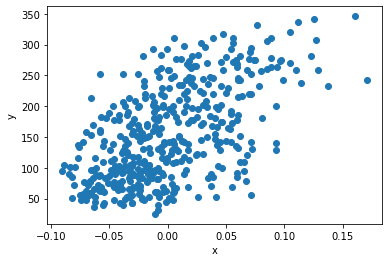

In [193]:
from sklearn import datasets
from matplotlib import pyplot as plt
diabetes_x, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_x = diabetes_x[:, np.newaxis, 2] # this takes the second index in the second dimension, whilst keeping it a 2d array. The data will look like [[1], [2], [3], ...]

plt.scatter(diabetes_x, diabetes_y) # plot the x and y values in a scatter plot - we can see any trends by doing this
plt.xlabel("x")
plt.ylabel("y")

We will also split our data into a test and training dataset. We use sklearn's built-in function for this. `test_size` sets the percentage of the dataset to use as test data and `shuffle` enables randomisation of the data.

In [194]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(diabetes_x, diabetes_y, test_size=0.2, shuffle=True)

We can now train the linear regression model - this uses sklearn. 

In [195]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

We can show the coefficient and the intercept. Note there is only one coefficient here - this loops back to us only using a single-feature (one independent variable) dataset for this model. Generally, the formula for linear regression can be considered `y = f1*x1 + f2*x2 + f3*x3... + fn*xn + c` where `f` is the coefficient for a feature, `x` is the x-value for the feature (so `f1` is the coefficient for feature 1 and `x1` is an x-value for feature 1), and `c` is the sum of all biases (intercept). That means that here, with our single feature model, this formula is `y=f1 + c`. You may notice this is just `y = mx + c` - the equation of a straight line with `m` being the gradient and `c` being the y-intercept.

You may see a more formal definition of linear regression as `y=b0 + b1*x1 + ... + bn*xn + e`. This is the same equation with `b0` being the sum of all biases, and `e` being the error of our model. To explain `e` you can consider a single datapoint in our training data, x and y. For a typical, non-perfect model if you plug the x value(s) into the above equation then you will (usually) not get the exact value of `y`. This is because our model is generalised to our entire dataset, and so unless the datapoint lies exactly where our model has generalised the predicted `y` value will always be `e` distance from the true `y` value.

In [196]:
print("Model coefficient(s): {}".format(model.coef_)) # note that this is an array but it only has one value for this dataset
print("Model intercept: {}".format(model.intercept_))

Model coefficient(s): [937.00070297]
Model intercept: 150.90553447705963


We can visualise this model onto our training data. The above explaination of linear regression should help you understand line 2 in detail.

Text(0, 0.5, 'y')

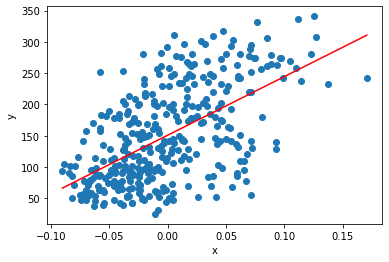

In [197]:
x_values = np.linspace(x_train.min(), x_train.max(), 100) # creates a list of 100 evenly spaced numbers between the min and max values of x_train
y_values = model.intercept_ + model.coef_[0] * x_values # applies our single-feature model coefficient and bias onto the x values - can be considered to be y = mx + c
plt.scatter(x_train, y_train) # plot our training data
plt.plot(x_values, y_values, color="red") # plot our model line
plt.xlabel("x")
plt.ylabel("y")

We can test the accuracy of our model with our test data and the Mean Squared Error (MSE) metric. We can also compute the Root Mean Squared Error (RMSE).

Mathematically, MSE is `(1/n) * Σ(truth – predicted)2` where `n` is the number of datapoints, and `truth` and `predicted` are the "real" and the model-produced values respectively. We can explain this formula as the sum of the squared distance between the real and the predicted value for each datapoint, then divided by the number of datapoints.
MSE alone can be difficult to interpret as it is the average of the squared distances - so it will be on a different scale to the true values. RMSE solves this by simply being the root of the MSE.

During training of a linear regression model MSE or RMSE is used as a loss function - the fit function will try to optimise the model around the goal of minimising the output of the loss function.

In [198]:
from sklearn.metrics import mean_squared_error
y_predict = model.predict(x_test)
error = mean_squared_error(y_test, y_predict)
print(f"MSE: {error:.3f}")
print(f"RMSE: {np.sqrt(error):.3f}")

MSE: 3606.534
RMSE: 60.054


# Exercise

The below function generates a dataset (variables x and y) for you to build a linear regression model from:

In [199]:
# you do not need to understand this, only use the produced x and y
count = 300
x = np.linspace(0, 10, count)
y = np.random.normal(loc=x, scale=1.5)
x = x.reshape((count, 1))

Visualise the above dataset (see if it has a correlation - will it work with linear regression?), split it into train and test datasets, train a linear regression model, and compute the Root Mean Squared Error.

In [200]:
# visualise here

In [201]:
# split and train here

In [202]:
# compute the RMSE here

# Visualization
## Cool library, confusing documentation

Matplotlib is an amazing library that allows you to do all sorts of cool visualizations in python, however it's one pitfall is that it's documentation can seem *SUPER* confusing.

### Figures? Plots? Axes? Can I just get a graph?

Matplotlib has one global `pyplot` object. You'll often see this imported as and reffered to as `plt` in code snippets and on help forums. This global plot object can then be used to create figures and axes using `plt.subplots()`.

[Figures](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) are essentially the canvas onto which you can put axes onto. You'll use this to mostly change things like the layout, or to get an image at the end.

[Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes) contain most of the elements that your figure contains. When you plot something, you'll be plotting it on the axes. Need to change the ticks on a graph? Axes. Need to change the bounds of your graph? Axes. Need to set the labels? Axes. Need to get an automatic 100% on your coursework? Axes can't get you that, although, without them you won't get close.

You can check the docs for any functionality I don't explicitly mention, but I'll try to use most of what you'll need in following examples

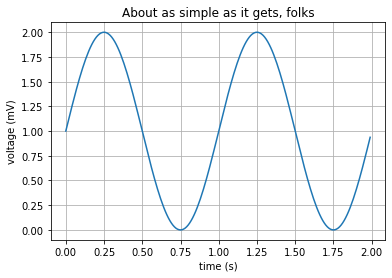

In [1]:
# This is stolen from the matplotlib docs. Never reinvent the wheel
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/simple_plot.html#sphx-glr-gallery-lines-bars-and-markers-simple-plot-py
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

### Ok. So I can draw a sine wave graph, but how about making this relevant to my coursework?

The folks behind Pandas decided one day that "Hey! You know, our dataframes are often used to plot graphs! What if we made it easy?". I guess that's why they added the `plot()` function to dataframes.

In [2]:
import pandas as pd

df = pd.read_csv("googleplaystore.csv")

df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


You'll notice that we have a couple of columns to work with, so let's start with categories, I'm actually quite interested to see what we get...

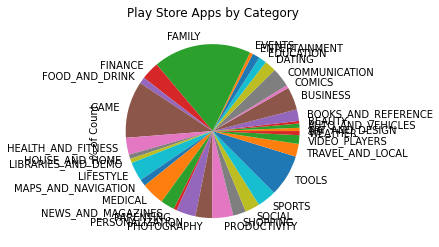

In [3]:
ax = df.groupby(["Category"]).size().plot(
    kind='pie', # What type of plot do I want
    ylabel="% of Count", # We only need the y axis toi be labelled on a pie chart
    title="Play Store Apps by Category"
)

Not really readable, lets adjust it so we can read it better

Text(0.5, 1.2, 'Play Store Apps by Category')

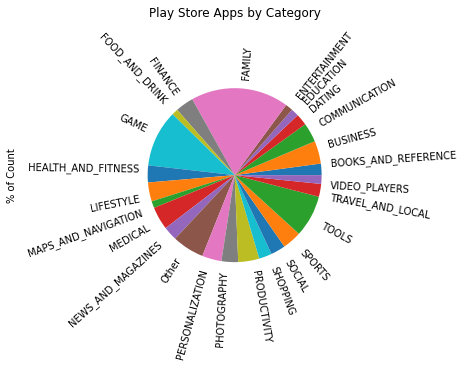

In [4]:
# Calculate the minimum size of a category (We'll combine categories less than 1 percent)
min_size = len(df.index) * 0.01
# Calculate all the group sizes
groupsSize = df.groupby("Category").size()
# Create a new row that shows the regular category or Other if the category size is too low
df["Filtered Category"] = df["Category"].apply(lambda x : x if groupsSize[x] > min_size else "Other")

# Create a new pie chart, note how this method returns an axes object
ax = df.groupby("Filtered Category").size().plot(
    kind='pie', # What type of plot do I want
    ylabel="% of Count", # We only need the y axis toi be labelled on a pie chart
    rotatelabels=True # Rotate the labels around the pie chart
)

# Set the label coordinates, these were painstakingly manually tuned
ax.yaxis.set_label_coords(-0.5, 0.5) # Set the coordinates of the y label
ax.set_title("Play Store Apps by Category", y = 1.2) # Set the title of the chart, and set it's y postion

Now I can confidently say that Family has the lions share in terms of categories of App;.

Let's try visualise some bar charts next with the number of installs per category

<AxesSubplot:title={'center':'Play Store App Installs by Category'}, xlabel='Category', ylabel='Number of Installs'>

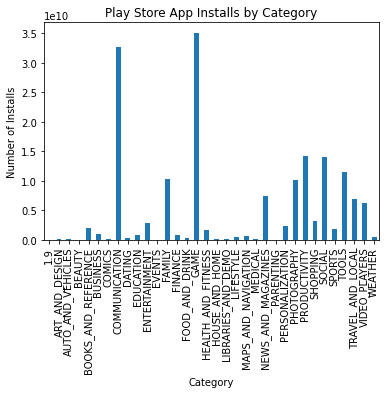

In [5]:
import re

# This is using pythons built in regex library.
# Here I'm simply trying to remove none number elements from the Install's string
# This isn't super important to know, but know that it works
notNumberRegex = re.compile("\\D")

# Trivial function to attempt to convert something to an in, and return 0 if it fails
# This is also acting as a form of filling
def tryint(value):
    try:
        return int(value)
    except ValueError:
        return 0

# The best approach with pandas is often to either
#  A) Make a new dataframe from your existing one and modify that one
#  b) Just add a new row
df["InstallsInt"] = df["Installs"].apply(lambda x : tryint(notNumberRegex.sub("", x)))
df.groupby("Category")["InstallsInt"].sum().plot(
    kind="bar",
    ylabel="Number of Installs", # We only need to provide the y axis as the X axis will be automatically labelled by what we groupby
    title="Play Store App Installs by Category"
)

How about a simple line chart? Let's see how average installs affects the rating of an application

In [6]:
# Group our dataframe by the number of installs
# This allows us to take results that would be plotted on the same point and average them
df.groupby(df["InstallsInt"])["Rating"].mean()

InstallsInt
0             19.000000
1              5.000000
5              4.611111
10             4.624638
50             4.419643
100            4.363430
500            4.176617
1000           4.066760
5000           4.024537
10000          4.039703
50000          4.051178
100000         4.110261
500000         4.168216
1000000        4.220862
5000000        4.243218
10000000       4.313419
50000000       4.351211
100000000      4.411491
500000000      4.350000
1000000000     4.258621
Name: Rating, dtype: float64

Notice that it seems our zero column is giving us some erroneous results. Lets remove troublesome results

<AxesSubplot:title={'center':'Number of Installs vs Avg. Rating'}, xlabel='Number of Installs', ylabel='Average Rating'>

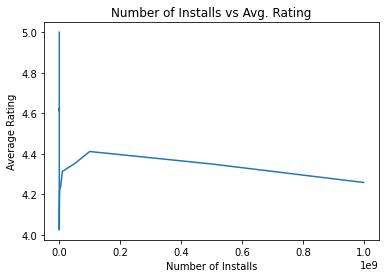

In [7]:
# Here we simply are dropping rows with invalid ratings. Check earlier for more tips on pre-processing
df[df["Rating"] <= 5].groupby(df["InstallsInt"])["Rating"].mean().plot(
    kind="line",
    xlabel="Number of Installs",
    ylabel="Average Rating",
    title="Number of Installs vs Avg. Rating"
)

### Understanding the Confusion Matrix Code

This is some code that Dr Qu provides you in a couple of examples. I thought it would be nice just to show it again here and also explain what it's doing, because when I used it, I never really understood what it did...

Text(0, 0.5, 'true label')

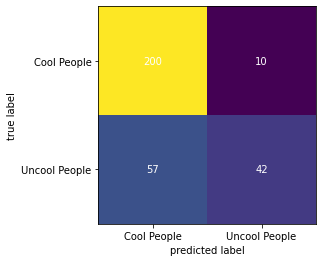

In [8]:
# This is the actual matrix that gets passed in. It's normally generated from `metrics.confusion_matrix(y_test, ann1_y_predict)`
cm = np.array([[200,10],[57, 42]])
labels = ["Cool People", "Uncool People"]
# Create a new subplot
fig, ax = plt.subplots()
# Show the array as an image on the axes. Yeah, matplotlib does this. It's crazy
# This however only does the cool colour squares
ax.imshow(cm)

# Set the x label positions
ax.set_xticks(range(0,len(labels)))
# Set the y label positions
ax.set_yticks(range(0,len(labels)))
# Set the x label values
ax.set_xticklabels(labels)
# Set the y label values
ax.set_yticklabels(labels)

# For each tick on each axis
for i in range(0,len(labels)):
    for j in range(0,len(labels)):
        # Add text on the image with the respective value
        # note the use of the ha (horizontal alignment), va (vertical alignment), and colour options being used here.
        # there are loads more options you can check out in the docs as well. Try them out
        ax.text(j, i, cm[i, j], ha="center", va="center", color="w")

# Add a label to the x axis
ax.set_xlabel('predicted label')
# Add a label to the y axis
ax.set_ylabel('true label')

## Using the Docs

I am completely convinced that upon completion of this worksheet that now you have a total understanding of how to do enough graphs for your coursework, but occasionally you may want to create a graph from scratch, so just incase, here is how to best use the documentation.

[Luckily for you the documentation you get to use](https://matplotlib.org/stable/index.html) is a lot better that the one I had to work with only last year.
![I HATED these doc pages](SoGladItsChanged.png)
<figcaption align="center"><b>Old doc pages weren't as fun to navigate</b></figcaption>

### Finding what you need

[You can find the API here for MatPlotLib](https://matplotlib.org/stable/api/index.html)

[And the pandas API can be found here](https://pandas.pydata.org/docs/index.html) although what you'll need for plotting is most likely [this](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)

When searching for something on the docs, your best chance involves trying top be as specific as possible, for example if I want to learn what types of plots I can create and what the parameters of the plot function are, I want to be searching for `matplotlib.Axes.plot` because I know it's a function of the Axes class, but you'll normally find what you want on these new websites.

Both MatPlotLib and Pandas have some [great examples as well](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html) that you can ~~steal~~ *borrow* code from. Using these examples as a base for your own work isn't a crime, there's not a lot of ways you can draw a graph, plus you're being marked on being able to understand AI models, not on how well you can use matplotlib: here Matplotlib is just a tool to convey your understanding.

## Optional Excercises

\[Easy\] Can you make a pie chart of the tpyes of application available

In [9]:
# Your code here

\[Medium?\] Can you make a simple scatter graph of number of reviews to the rating?

Hint: The `"kind"` of plot for scatter is... well, `"scatter"`

In [10]:
# Your code here

\[Hard\] I just need you to make a histogram of the number of applications created by date, split by month.

Hint: I'm making you check the docs for this one

In [11]:
# Your code here

\[Impossible\] Make any 4 scale graph from this data; That's an axis on all sides

Hint: [This example should help slightly](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)

In [12]:
# Your code here